Используя базу "Пассажиры автобуса", подготовьте данные для обучения нейронной сети, классифицирующей изображение на два класса:
- входящий пассажир
- выходящий пассажир

Добейтесь точности работы модели на проверочной выборке не ниже 85%

Ссылка на датасет: https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip

Информацию о загрузке изображений и преобразовании их в numnpy-массивы вы можете найти в Базе знаний:


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

In [2]:
# Загрузка датасета из облака
import gdown
gdown.download(' https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip', None, quiet=True)

'bus.zip'

In [3]:
!unzip -q bus.zip

In [4]:
base_dir = '/content'

# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []

img_height = 20
img_width = 20


In [5]:
for patch in os.listdir(base_dir):
    if patch == 'Выходящий' or patch == 'Входящий':
      # Перебор файлов в папках
      for img in os.listdir(base_dir + '/' + patch):
          # Добавление в список изображений текущей картинки
          x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                      target_size=(img_height, img_width),
                                                      color_mode='grayscale')))
          # Добавление в массив меток, соответствующих классам
          if patch == 'Выходящий':
              y_train.append(0)
          elif patch == 'Входящий':
              y_train.append(1)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_org = np.array(x_train)
y_train_org = np.array(y_train)

# Вывод размерностей
print('Размер массива x_train_org', x_train_org.shape)
print('Размер массива y_train_org', y_train_org.shape)

Размер массива x_train_org (9081, 20, 20, 1)
Размер массива y_train_org (9081,)


In [6]:
x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(x_train_org, # набор параметров
                                                    y_train_org, # набор меток классов
                                                    test_size=0.2, # процент в тестовую
                                                    shuffle=True, #  перемешивание
                                                    random_state=3) # воспроизводимость

# Выведем размерность полученных выборок

print('Обучающая выборка параметров', x_train_org.shape)
print('Обучающая выборка меток классов', y_train_org.shape)
print()
print('Тестовая выборка параметров', x_test_org.shape)
print('Тестовая выборка меток классов', y_test_org.shape)

Обучающая выборка параметров (7264, 20, 20, 1)
Обучающая выборка меток классов (7264,)

Тестовая выборка параметров (1817, 20, 20, 1)
Тестовая выборка меток классов (1817,)


In [7]:
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (7264, 20, 20, 1) -> (7264, 400)
Форма  тестовых данных: (1817, 20, 20, 1) -> (1817, 400)


In [8]:
CLASS_COUNT = 2

# Преобразование ответов в формат one_hot_encoding
y_train = keras.utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = keras.utils.to_categorical(y_test_org, CLASS_COUNT)

print(y_train.shape)

(7264, 2)


Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6099 - loss: 26.8780 - val_accuracy: 0.7138 - val_loss: 1.2422
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6694 - loss: 1.6316 - val_accuracy: 0.7100 - val_loss: 1.1971
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7081 - loss: 1.1900 - val_accuracy: 0.7094 - val_loss: 1.1482
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7107 - loss: 1.1580 - val_accuracy: 0.7094 - val_loss: 1.0876
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7168 - loss: 1.0940 - val_accuracy: 0.7089 - val_loss: 1.0450
Epoch 6/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7133 - loss: 1.0594 - val_accuracy: 0.7094 - val_loss: 1.0067
Epoch 7/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7136 - loss: 1.0125 - val_accuracy: 0.7100 - val_loss: 0.9726
Epoch 8/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7113 - loss: 0.9907 - val_accuracy: 0

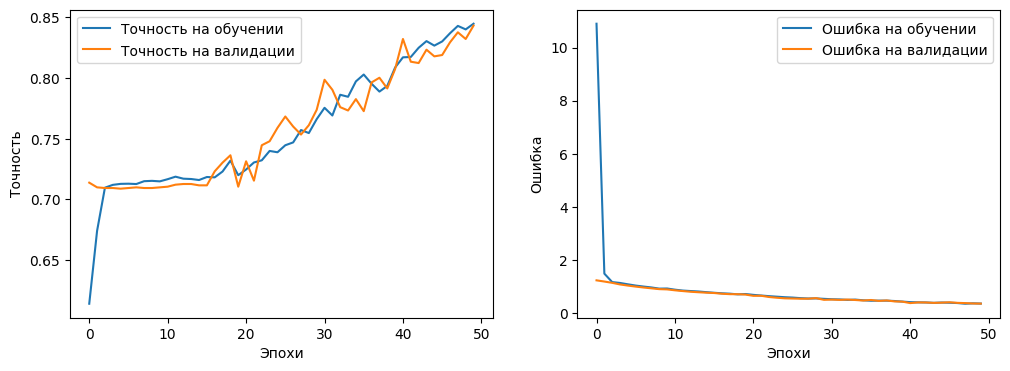

In [10]:
# Создание модели
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(img_height * img_width,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(CLASS_COUNT, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=50,
    validation_data=(x_test, y_test),
    verbose=1
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'\nТочность на тестовой выборке: {test_acc:.2f}')

# Визуализация процесса обучения
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Ошибка на обучении')
plt.plot(history.history['val_loss'], label='Ошибка на валидации')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend()
plt.show()
